In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns

In [ ]:
senate_results = pd.read_csv("/content/7. US Senate Results by State-Table 1.csv")
senate_results.head()

,1,STATE ABBREVIATION,STATE,DISTRICT,FEC ID,(I) INCUMBENT INDICATOR,CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,2ND ROUND RCV VOTES,2ND ROUND RCV %,3RD ROUND RCV VOTES,3RD ROUND RCV %,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,AL,Alabama,S,S2AL00145,NaN,Katie,Britt,"Britt, Katie",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AL,Alabama,S,S8AL00381,NaN,Mo,Brooks,"Brooks, Mo",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,AL,Alabama,S,S2AL00202,NaN,Mike,Durant,"Durant, Mike",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,AL,Alabama,S,S2AL00160,NaN,Jake,Schafer,"Schafer, Jake",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
house_results = pd.read_csv("/content/8. US House Results by State-Table 1.csv")
house_results.head()

,1,STATE ABBREVIATION,STATE,DISTRICT,FEC ID,(I) INCUMBENT INDICATOR,CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,COMBINED GE PARTY % (when applicable),PE WINNER INDICATOR,GE WINNER INDICATOR,FOOTNOTES,1ST ROUND RCV VOTES,1ST ROUND RCV %,2ND ROUND RCV VOTES,2ND ROUND RCV %,3RD ROUND RCV VOTES,3RD ROUND RCV %
0,2,AL,Alabama,NaN,NaN,NaN,NaN,NaN,DISTRICT 1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,AL,Alabama,01,H0AL01055,(I),Jerry,Carl,"Carl, Jerry",NaN,...,NaN,W,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AL,Alabama,01,H2AL01218,NaN,Alexander M.,Remrey,"Remrey, Alexander M.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,AL,Alabama,01,NaN,NaN,NaN,Scattered,Scattered,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,AL,Alabama,01,NaN,NaN,NaN,NaN,NaN,District Votes:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
senate_winners = senate_results[senate_results["GE WINNER INDICATOR"] == "W"][["STATE", "FEC ID", "CANDIDATE NAME", "GENERAL %"]].copy()
senate_winners["Office"] = "Senate"

house_winners = house_results[house_results["GE WINNER INDICATOR"] == "W"][["STATE", "FEC ID", "CANDIDATE NAME", "GENERAL %"]].copy()
house_winners["Office"] = "House"

all_winners = pd.concat([senate_winners, house_winners], ignore_index=True)

all_winners.columns = ["State", "FEC ID", "Candidate", "General_Percent", "Office"]

all_winners["General_Percent"] = (
    all_winners["General_Percent"]
    .str.replace("%", "", regex=False)
    .str.strip()
    .astype(float)
)

all_winners.head()

,State,FEC ID,Candidate,General_Percent,Office
0,Alabama,S2AL00145,"Britt, Katie",66.62,Senate
1,Alaska,S4AK00099,"Murkowski, Lisa",43.37,Senate
2,Arizona,S0AZ00350,"Kelly, Mark",51.39,Senate
3,Arkansas,S0AR00150,"Boozman, John",65.73,Senate
4,California,S2CA00955,"Padilla, Alex",60.89,Senate


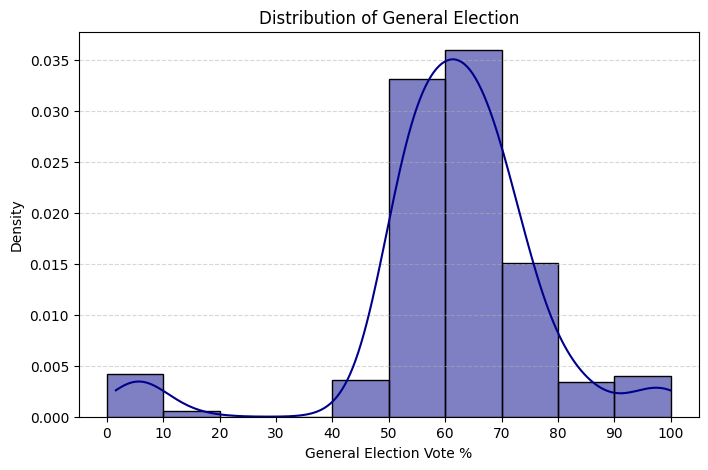

In [ ]:
all_winners = all_winners[np.isfinite(all_winners["General_Percent"])]

plt.figure(figsize=(8, 5))
sns.histplot(
    all_winners["General_Percent"],
    bins=range(0, 101, 10),
    kde=True,
    stat='density',
    color='darkblue',
    edgecolor='black'
)

plt.xlabel("General Election Vote %")
plt.ylabel("Density")
plt.title("Distribution of General Election")
plt.xticks(range(0, 101, 10))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

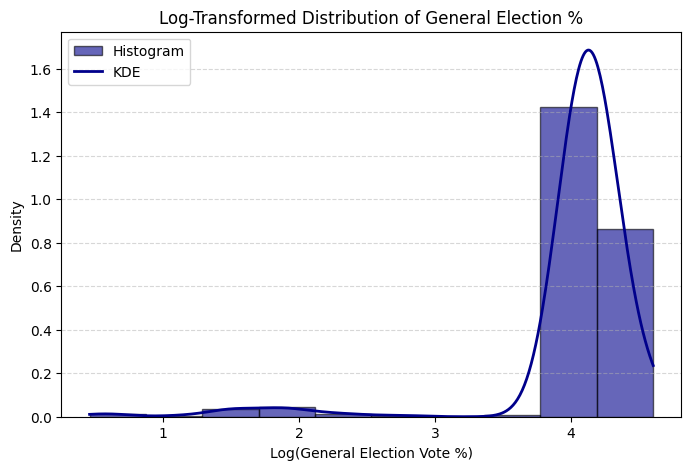

In [ ]:
log_percent = np.log(all_winners["General_Percent"])

kde = gaussian_kde(log_percent)
x_vals = np.linspace(log_percent.min(), log_percent.max(), 500)
kde_vals = kde(x_vals)

plt.figure(figsize=(8, 5))
plt.hist(log_percent, bins=10, density=True, color='darkblue', edgecolor='black', alpha=0.6, label='Histogram')
plt.plot(x_vals, kde_vals, color='darkblue', linewidth=2, label='KDE')

plt.xlabel("Log(General Election Vote %)")
plt.ylabel("Density")
plt.title("Log-Transformed Distribution of General Election %")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
cand = pd.read_csv("/content/candidate_summary_2022.csv")
cand.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H2CA01185/?...,"GODFREY, MARCUS SCOTT",H2CA01185,H,CA,1.0,LIB,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,https://www.fec.gov/data/candidate/S2MO00502/?...,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,OPEN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,https://www.fec.gov/data/candidate/S2FL00532/?...,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,https://www.fec.gov/data/candidate/H2AZ04200/?...,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,https://www.fec.gov/data/candidate/S2WI00367/?...,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
selected_columns = [
    'Cand_Name',
    'Cand_Id',
    'Cand_Office',
    'Cand_Office_St',
    'Cand_Office_Dist',
    'Cand_Party_Affiliation',
    'Total_Receipt',
    'Individual_Contribution',
    'Cand_Contribution',
    'Party_Committee_Contribution',
    'Other_Committee_Contribution',
    'Total_Contribution',
    'Transfer_From_Other_Auth_Committee',
    'Cand_Loan',
    'Other_Loan',
    'Total_Loan'
]

filtered_cand = cand[selected_columns]
filtered_cand.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Total_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,Total_Loan
0,"GODFREY, MARCUS SCOTT",H2CA01185,H,CA,1.0,LIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
merged_df = filtered_cand.merge(all_winners[["FEC ID", "General_Percent"]], left_on="Cand_Id", right_on="FEC ID", how="left")
merged_df.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Total_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,Total_Loan,FEC ID,General_Percent
0,"GODFREY, MARCUS SCOTT",H2CA01185,H,CA,1.0,LIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
merged_df_clean = merged_df.dropna(subset=["General_Percent"])
merged_df_clean.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Total_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,Total_Loan,FEC ID,General_Percent
99,"BUSH, CORI",H8MO01143,H,MO,1.0,DEM,2448937.35,2236989.39,0.0,0.0,144949.24,2381938.63,58124.70,0.0,0.0,0.0,H8MO01143,72.86
105,"KENNEDY, JOHN NEELY",S4LA00065,S,LA,0.0,REP,34338881.57,32141730.16,0.0,0.0,1332064.68,33473794.84,582253.98,0.0,0.0,0.0,S4LA00065,61.56
283,"WENSTRUP, BRAD DR.",H2OH02085,H,OH,2.0,REP,2088194.25,774831.55,0.0,0.0,1204950.00,1979781.55,105757.87,0.0,0.0,0.0,H2OH02085,74.50
335,"KIM, YOUNG",H8CA39240,H,CA,40.0,REP,9340940.92,6870711.32,0.0,5000.0,1647272.10,8522983.42,751424.24,0.0,0.0,0.0,H8CA39240,56.84
339,"BAIRD, JAMES R DR.",H8IN04199,H,IN,4.0,REP,434679.53,187413.86,0.0,0.0,243379.50,430793.36,3354.17,0.0,0.0,0.0,H8IN04199,68.22


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


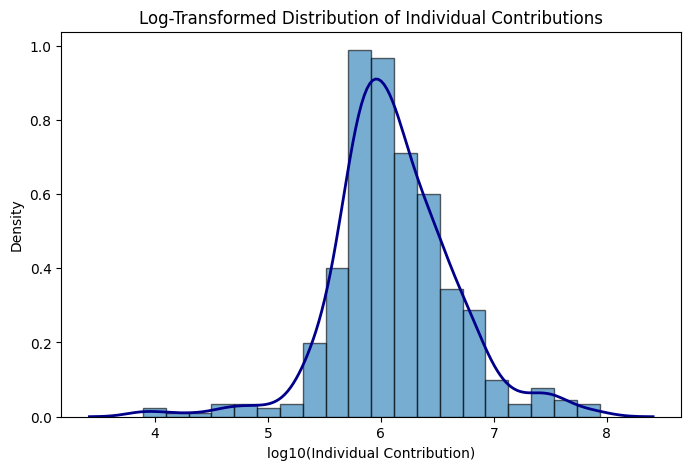

In [ ]:
log_values = np.log10(merged_df_clean["Individual_Contribution"])
log_values = log_values[log_values > -np.inf]

plt.figure(figsize=(8, 5))
plt.hist(log_values, bins=20, edgecolor='black', alpha=0.6, density=True)
sns.kdeplot(log_values, linewidth=2, color='darkblue')

plt.title("Log-Transformed Distribution of Individual Contributions")
plt.ylabel("Density")
plt.xlabel("log10(Individual Contribution)")
plt.show()

<ipython-input-205-acff6ffc986d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_receipt, y="Cand_Name", x="Total_Receipt", palette=colors)
<ipython-input-205-acff6ffc986d>:5: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  sns.barplot(data=top_receipt, y="Cand_Name", x="Total_Receipt", palette=colors)


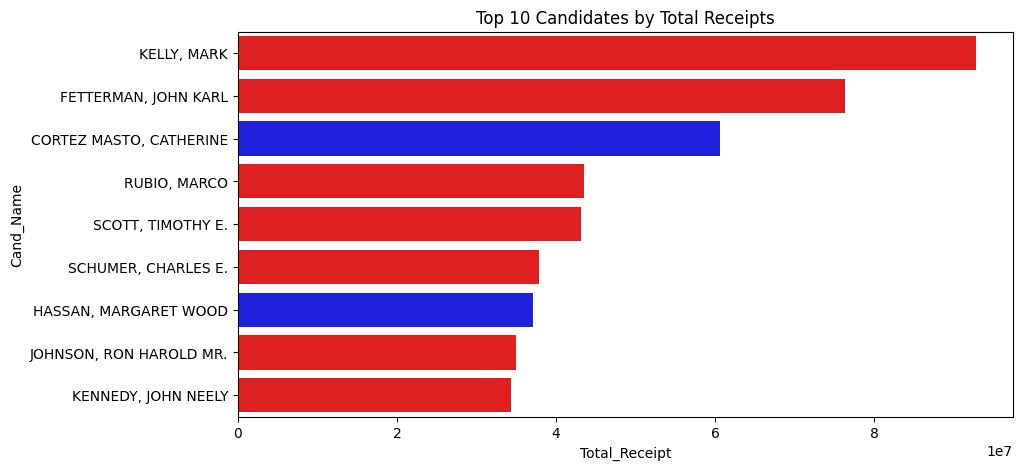

In [ ]:
top_receipt = merged_df_clean.nlargest(10, "Total_Receipt")
colors = top_receipt["General_Percent"].map(lambda x: "red" if x > 50 else "blue").tolist()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_receipt, y="Cand_Name", x="Total_Receipt", palette=colors)
plt.title("Top 10 Candidates by Total Receipts")
plt.show()